In [1]:
#Adding necessary imports 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
#Setting batch size, height, and width 
batch_size = 32
img_height = 180
img_width = 180

#Pathway to train, validation, and test folders
train_dir = r"C:\Users\jhw7598\Documents\MLProject\Alzheimer_Dataset_V2\train"
val_dir = r"C:\Users\jhw7598\Documents\MLProject\Alzheimer_Dataset_V2\val"
test_dir = r"C:\Users\jhw7598\Documents\MLProject\Alzheimer_Dataset_V2\test"

In [3]:
#using TensorFlow to process the images for the CNN (training images)
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred', #labels are inferrred from structure of subfolders in alphabetical order
    label_mode='int', #this means labels will be 0 or 1
    color_mode='grayscale', #black and white brain scans 
    batch_size=batch_size,
    image_size=(img_height, img_width), 
    shuffle=True, 
    seed=123,
)



Found 12992 files belonging to 2 classes.


In [4]:
#using TensorFlow to process the images for the CNN (validation images)
ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    labels='inferred', 
    label_mode='int', 
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(img_height, img_width), 
    shuffle=False, 
    seed=123,
)


Found 2784 files belonging to 2 classes.


In [5]:
#using TensorFlow to process the images for the CNN (testing images)
ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred', 
    label_mode='int', 
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(img_height, img_width), 
    shuffle=False, 
    seed=123,
)

Found 2784 files belonging to 2 classes.


In [6]:
#This cell is scaling the images on a 0-1 scale(better for neural networks)
#The train, val, and testing folders images are all being rescaled while the labels are staying the same
normalization_layer = Rescaling(1./255)

ds_train = ds_train.map(lambda x, y: (normalization_layer(x), y))
ds_val = ds_val.map(lambda x, y: (normalization_layer(x), y))
ds_test = ds_test.map(lambda x, y: (normalization_layer(x), y))

In [21]:
#This is our Convolotional Neural Network
#Our network has 5 layers 
#We use convolutional, pooling, dense, and dropout layers
#We use 2 activations which are relu and sigmoid
#relu will make negative values 0 and transform positive values on a 0-1 scale
#Sigmoid is for binary classification (outputs a probability for classification)
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(.5),
    Dense(64, activation='relu'),
    Dropout(.5),
    Dense(1, activation='sigmoid')   
])

#Compile the model and evaluate loss and accuracy 
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#Add early stopping to revert back to best model performance after 3 epochs of no improvement 
early_stop = EarlyStopping(
    monitor='val_loss',        
    patience=3,                
    restore_best_weights=True 
)

#Fit the model with training and validation data so we can view loss and accuracy over 10 epochs
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=10,
    callbacks=[early_stop]
)

#Evaluate our model on testing images to evaluate performance
results = model.evaluate(
    ds_test,
    verbose=1 # show the progress
)

#Print test loss and accuracy
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

Epoch 1/10


C:\Users\jhw7598\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


406/406 ━━━━━━━━━━━━━━━━━━━━ 93s 225ms/step - accuracy: 0.5826 - loss: 0.6691 - val_accuracy: 0.6624 - val_loss: 0.6230
Epoch 2/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 81s 199ms/step - accuracy: 0.6927 - loss: 0.5958 - val_accuracy: 0.7310 - val_loss: 0.5368
Epoch 3/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 81s 199ms/step - accuracy: 0.7442 - loss: 0.5183 - val_accuracy: 0.7805 - val_loss: 0.4532
Epoch 4/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 82s 202ms/step - accuracy: 0.8034 - loss: 0.4084 - val_accuracy: 0.8071 - val_loss: 0.4136
Epoch 5/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 82s 201ms/step - accuracy: 0.8536 - loss: 0.3179 - val_accuracy: 0.8603 - val_loss: 0.3116
Epoch 6/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 94s 232ms/step - accuracy: 0.8869 - loss: 0.2509 - val_accuracy: 0.8617 - val_loss: 0.3317
Epoch 7/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 92s 226ms/step - accuracy: 0.9123 - loss: 0.1995 - val_accuracy: 0.8858 - val_loss: 0.3020
Epoch 8/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 147s 361ms/step - accuracy: 0.9245 - loss: 0.1776 - va

In [22]:
import numpy as np
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

class_labels = ['Healthy (0)', 'Mild Dementia (1)'] 

# Predict probabilities for the test dataset
y_pred_probs = model.predict(ds_test).ravel()  

# getting the true labels or ground truth 
y_true = np.concatenate([y for x, y in ds_test], axis=0)
#.5 threshold for dementia vs healthy 
y_pred = (y_pred_probs >= 0.5).astype(int)

#print the classification report
print("\n--- Final Test Metrics ---")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4, target_names=class_labels))

87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step

--- Final Test Metrics ---

Classification Report:
                   precision    recall  f1-score   support

      Healthy (0)     0.9121    0.8715    0.8913      1440
Mild Dementia (1)     0.8686    0.9100    0.8888      1344

         accuracy                         0.8901      2784
        macro avg     0.8903    0.8907    0.8901      2784
     weighted avg     0.8911    0.8901    0.8901      2784



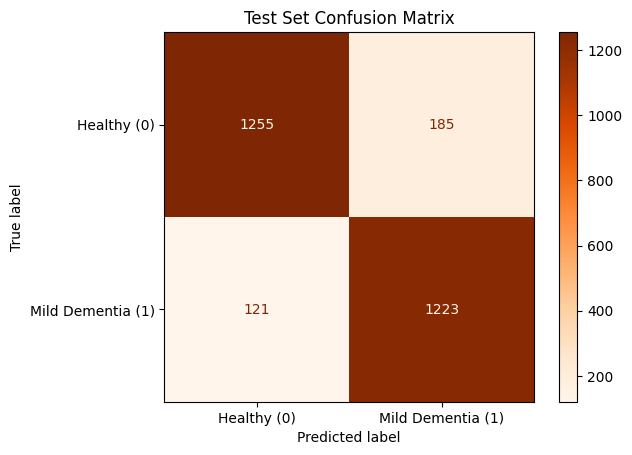

In [31]:
#This cell creates a nice confusion matrix plot 
import matplotlib.pyplot as plt

class_labels = ['Healthy (0)', 'Mild Dementia (1)'] 

#print("Confusion Matrix:")
disp = ConfusionMatrixDisplay.from_predictions(
    y_true, 
    y_pred,
    display_labels=class_labels, 
    cmap='Oranges'
)
disp.ax_.set_title("Test Set Confusion Matrix")
plt.show() 

Test AUC: 0.958759093915344


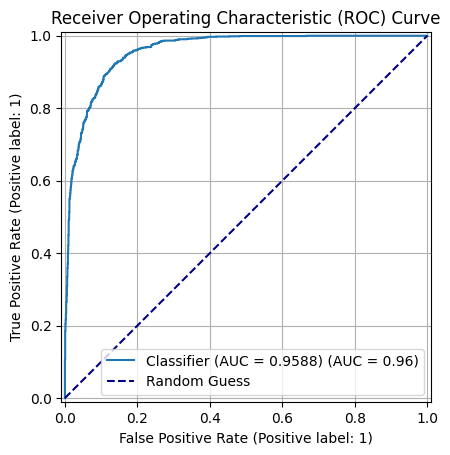

In [25]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

#Getting the area under the curve from roc_auc_score import 
auc = roc_auc_score(y_true, y_pred_probs)
print("Test AUC:", auc)

# Creating a AUC plot
RocCurveDisplay.from_predictions(
    y_true, 
    y_pred_probs, 
    name=f"Classifier (AUC = {auc:.4f})" # Display the AUC in the legend
)

plt.title('Receiver Operating Characteristic (ROC) Curve')

#This creates a random guess line (if model guessed it has .5 chance which is a diagonal line)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess') 

plt.legend(loc="lower right") 
plt.grid(True) 
plt.show() 

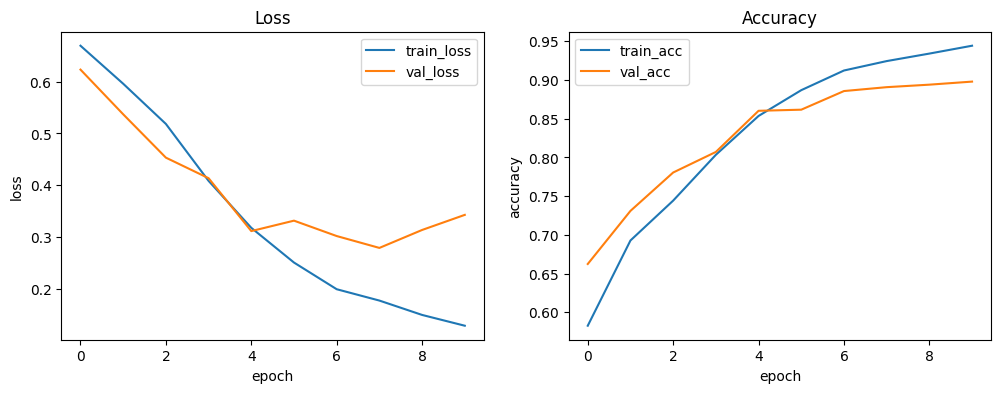

In [26]:
# plot loss and accuracy graphs to assess overfitting
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch'); plt.ylabel('loss'); plt.legend(); plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('epoch'); plt.ylabel('accuracy'); plt.legend(); plt.title('Accuracy')
plt.show()


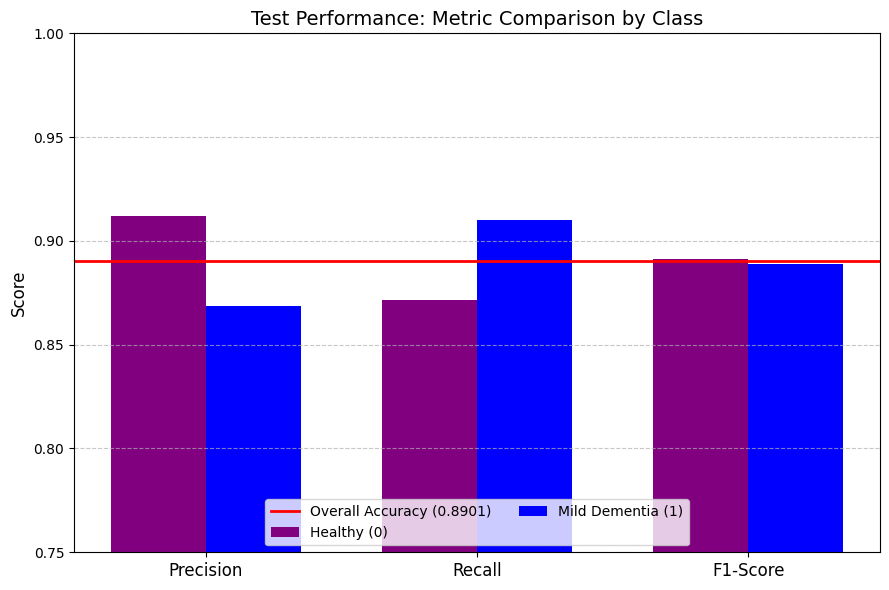

In [29]:
##############################
#ChatGPT was used to generate this plot!
############################

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Data Setup ---
data = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Healthy (0)': [0.9121, 0.8715, 0.8913],
    'Mild Dementia (1)': [0.8686, 0.9100, 0.8888]
}
df = pd.DataFrame(data)

# --- 2. Plotting ---

# Set up the plot area
fig, ax = plt.subplots(figsize=(9, 6))

# Prepare x-axis positions for the groups
x = np.arange(len(df['Metric']))
width = 0.35

# Plot bars for the 'Healthy' class
ax.bar(x - width/2, df['Healthy (0)'], width, 
       label='Healthy (0)', color='purple')

# Plot bars for the 'Mild Dementia' class
ax.bar(x + width/2, df['Mild Dementia (1)'], width, 
       label='Mild Dementia (1)', color='blue')

overall_accuracy = 0.8901
ax.axhline(overall_accuracy, color='red', linestyle='-', linewidth=2, 
           label=f'Overall Accuracy ({overall_accuracy:.4f})')

# --- 3. Customization ---

ax.set_title('Test Performance: Metric Comparison by Class', fontsize=14)
ax.set_ylabel('Score', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(df['Metric'], fontsize=12)

# Zoom in on the y-axis (0.75 to 0.90) to make the differences visible
ax.set_ylim(0.75, 1) 

ax.legend(loc='lower center', ncol=2, fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show() 